In [107]:
# 선형회귀
import pandas as pd
import numpy as np
import math
import scipy.stats as st

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
warnings.filterwarnings(action='ignore')

In [125]:
# x =[3,7,11,15,18,27,29,30,30,31,31,32,33,33,34,36,36,36,37,38,39,39,39,
#     40,41,42,42,43,44,45,46,47,50]
# y =[5,11,21,16,16,28,27,25,35,30,40,32,34,32,34,37,38,34,36,38,37,36,45,39,41,40,44,37,44,46,46,49,51]

x =np.array([77,50,71,72,81,94,96,99,67])
y =np.array([82,66,78,34,47,85,99,99,68])

df= pd.DataFrame({'x':x,'y':y})
model = ols('y ~ x',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     3.215
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.116
Time:                        16:16:10   Log-Likelihood:                -38.360
No. Observations:                   9   AIC:                             80.72
Df Residuals:                       7   BIC:                             81.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0623     34.661      0.348      0.738     -69.898      94.023
x              0.7771      0.433      1.793      0.116      -0.248       1.802
==============================================================================
Omnibus:                        4.029   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                2.055
Skew:                          -1.156   Prob(JB):                        0.358
Kurtosis:                       2.637   Cond. No.                         427.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# 계수  추정 불편추정량 , 
# x =[3,7,11,15,18,27,29,30,30,31,31,32,33,33,34,36,36,36,37,38,39,39,39,
#     40,41,42,42,43,44,45,46,47,50]
# y =[5,11,21,16,16,28,27,25,35,30,40,32,34,32,34,37,38,34,36,38,37,36,45,39,41,40,44,37,44,46,46,49,51]
# print(len(x))
# x=np.array(x)
# y=np.array(y)

x =np.array([77,50,71,72,81,94,96,99,67])
y =np.array([82,66,78,34,47,85,99,99,68])

xbar = np.mean(x)
ybar = np.mean(y)
print(xbar,ybar)
b1 = np.sum( ((x-xbar)*(y-ybar)) / np.sum((x-xbar)*(x-xbar)))
b0 = ybar - b1*xbar
print(b1,b0)

78.55555555555556 73.11111111111111
0.7771415987667915 12.062321074653163


In [147]:
avg_y= ybar # ybar
array_reg = x*b1+b0
array_y = y

SSE =((array_y-array_reg)**2).sum()      #Syy - b1*Sxy
SST =((avg_y-array_reg)**2).sum()
Total =((array_y-avg_y)**2).sum()       #Syy
print(SSE,SST,Total)
print("-------------------")

2653.9854657564406 1218.9034231324483 3872.8888888888882
-------------------


In [148]:
print("s^2=SSE/n-2:", SSE/(len(x)-2))
s = math.sqrt(SSE/(len(x)-2))

s^2=SSE/n-2: 379.14078082234863


In [149]:
Sxx =((x-xbar)**2).sum()
Sxy=(Total-SSE)/b1
Syy=Total
print("Syy:",Syy)
print("Sxx:",Sxx)
print("Sxy:",Sxy)

Syy: 3872.8888888888882
Sxx: 2018.2222222222224
Sxy: 1568.4444444444446


In [150]:
# 기울기 b1추론 : t 분포 양쪽
math.sqrt(SSE/(len(x)-2))
# 유의 확률 
a = 1-(0.05/2)
df = len(x)-2    # 자유도 
ts = st.t.ppf(a,df)
print("t 기준:",ts)
print(b1 - ((s*ts)/ math.sqrt(Sxx)))
print(b1 + ((s)*ts)/ math.sqrt(Sxx))

t 기준: 2.3646242510102993
-0.24774991580719619
1.8020331133407792


In [151]:
# b0 기울기 가설검정
xd= (x**2).sum()

# 유의 확률 
a = 1-(0.05/2)
n= len(x)
df = n-2    # 자유도 
ts = st.t.ppf(a,df)
print("t 기준:",ts)


print(b0 - ((s*ts*math.sqrt(xd))/ math.sqrt(n*Sxx)))
print(b0 + ((s*ts*math.sqrt(xd))/ math.sqrt(n*Sxx)))

t 기준: 2.3646242510102993
-69.89838997798074
94.02303212728708


In [124]:
# b1 기울기 가설검정
u=1.0
df = len(x)-2
m = b1
s = math.sqrt(SSE/(len(x)-2))
t0 = (m-u )/(s/math.sqrt(Sxx))
print("t0:",t0)
print("both: ",2*(1-st.t.cdf(abs(t0),df)))

t0: -0.514177717937761
both:  0.6229574972483363


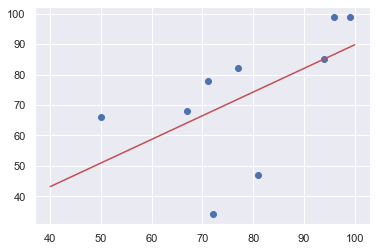

In [64]:
xfit = np.linspace(40,100,10000)
yfit = b1*xfit+b0
plt.scatter(x,y)
plt.plot(xfit,yfit,'r')
plt.show()